# The Logistic Map

The logistics map is a very simple iterative map that displays chaotic behavior. The [Wikipedia page](https://en.wikipedia.org/wiki/Logistic_map) is worth reading for details, and there is a nice introductory [video from Derek Muller of Veritasium](https://www.youtube.com/watch?v=ovJcsL7vyrk) on the topic.

The maps is given by

$$x_{n+1} = r x_n (1-x_n) $$

where $r \in \mathbb{R}$.

We can analyse the stability of the map by examining what happens in the limit $n\rightarrow\infty$. We can investigate this numerically by iterating, say, 1000 times and looking at the last 100 values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# The below two lines set the default size and font size for matplotlib
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [59]:
# Define the Logistic Map
def LogisticMap(r, x):
    return r * x * (1 - x)

Let's define a function that comptues the first 1000 iterations and then plots the final 100 values, for a given value of $r$.

In [68]:
def PlotLateIterations(r):
    res = np.zeros((1000,2))
    x = 1e-5
    for i in range(0,1000):
        x = LogisticMap(r, x)
        res[i, 0] = i
        res[i, 1] = x
        
    plt.scatter(res[100:,0], res[100:,1])

For values of $r<2$ the repeated application of the map tends to a single constant. For $3 \le r \le 1+\sqrt{6} \simeq 3.44949$ the behaiour changes and the the map oscillates between two constants. This change of behavior is known as a *bifurcation*.  A $r = 1+\sqrt{6}$  the map bifurcates again and for a values of $r$ just above $1+\sqrt{6}$ we find $x_n$ for large $n$ oscillates between 4 values.

Let's look at this visually by plotting the late iterations in the sequences for a few values.

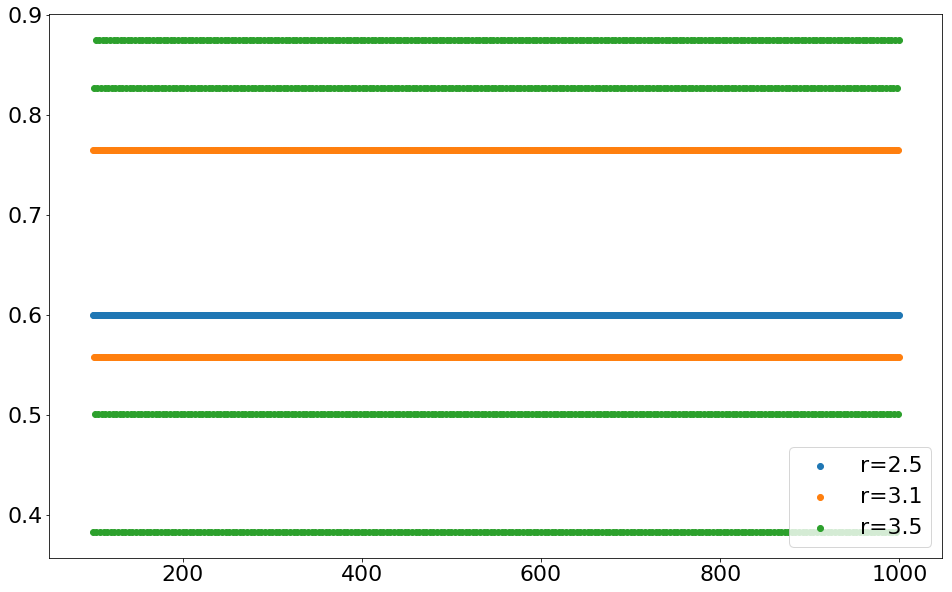

In [69]:
PlotLateIterations(2.5)
PlotLateIterations(3.1)
PlotLateIterations(3.5)


plt.legend(['r=2.5','r=3.1','r=3.5']);

What happens if we further increase $r$. Well more bifurcations happens and eventually the large $n$ behaviour of $x_n$ becomes chaotic. If we further increase $r$ we will find islands of stability which pass onces $r$ is further increased. This continues until $r\ge4$ where the map diverges as $n\rightarrow\infty$.

Let's look at the an example of a value of $r$ that leads to chaos

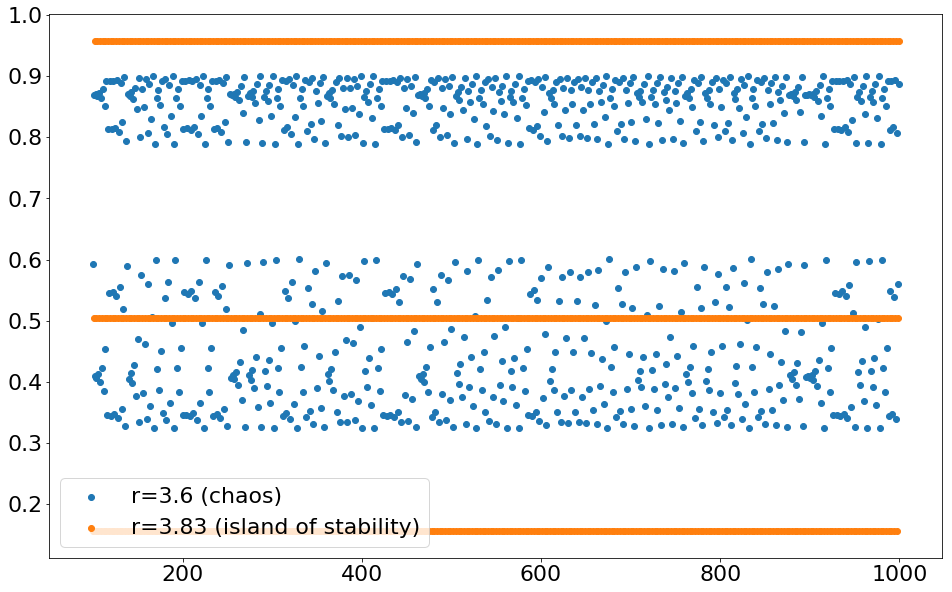

In [78]:
PlotLateIterations(3.6)
PlotLateIterations(3.83)

plt.legend(['r=3.6 (chaos)', 'r=3.83 (island of stability)']);

Let's now look at the behavior for all values of $r$. We could do this by writing a loop over many $r$ values but this turns out to be very slow. Instead, we make use of NumPy's vectorization to efficiently compute a result for many values of $r$. The result is known as a bifurcation map and it clearly shows the stable and chaotic regions of the map (as a function of $r$).

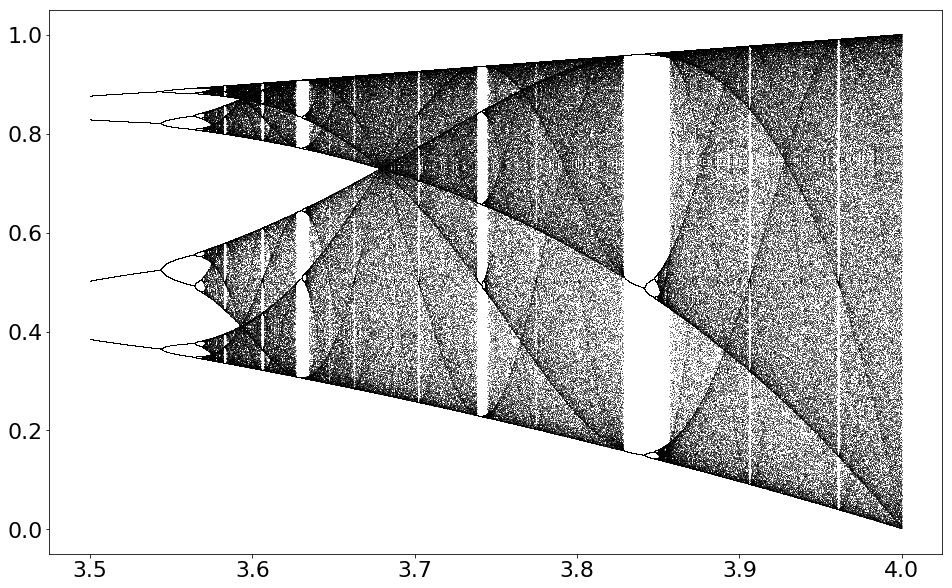

In [81]:
n = 10000
rmin = 3.5
rmax = 4.0
r = np.linspace(rmin, rmax, n)

iterations = 500
last = 50

x = 1e-5 * np.ones(n)

for i in range(iterations):
    x = logistic(r, x)
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        plt.plot(r, x, ',k', alpha=0.50)